In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.model_selection import train_test_split

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


* fruit_name：水果类别 
* mass: 水果质量 
* width: 水果的宽度 
* height: 水果的高度 
* color_score: 水果的颜色数值，范围0-1。 

![](https://raw.githubusercontent.com/davidkorea/Iris_classifier/master/images/color_score.jpg)

In [2]:
data_df = pd.read_csv('../data/fruit_data.csv')

In [5]:
data_df.head()

,fruit_name,mass,width,height,color_score
0,apple,192,8.4,7.3,0.55
1,apple,180,8.0,6.8,0.59
2,apple,176,7.4,7.2,0.60
3,mandarin,86,6.2,4.7,0.80
4,mandarin,84,6.0,4.6,0.79


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
fruit_name     59 non-null object
mass           59 non-null int64
width          59 non-null float64
height         59 non-null float64
color_score    59 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.4+ KB


**note1**

```data_df.columns.tolist()[1:]```, get column's name and tansform to list[], then get features name by slicing

In [10]:
FEAT_COLS = data_df.columns.tolist()[1:]
FEAT_COLS

['mass', 'width', 'height', 'color_score']

In [11]:
data_df.fruit_name.value_counts()

orange      19
apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [12]:
orange = data_df[data_df['fruit_name'] == 'orange']
apple = data_df[data_df['fruit_name'] == 'apple']
lemon = data_df[data_df['fruit_name'] == 'lemon']
mandarin = data_df[data_df['fruit_name'] == 'mandarin']

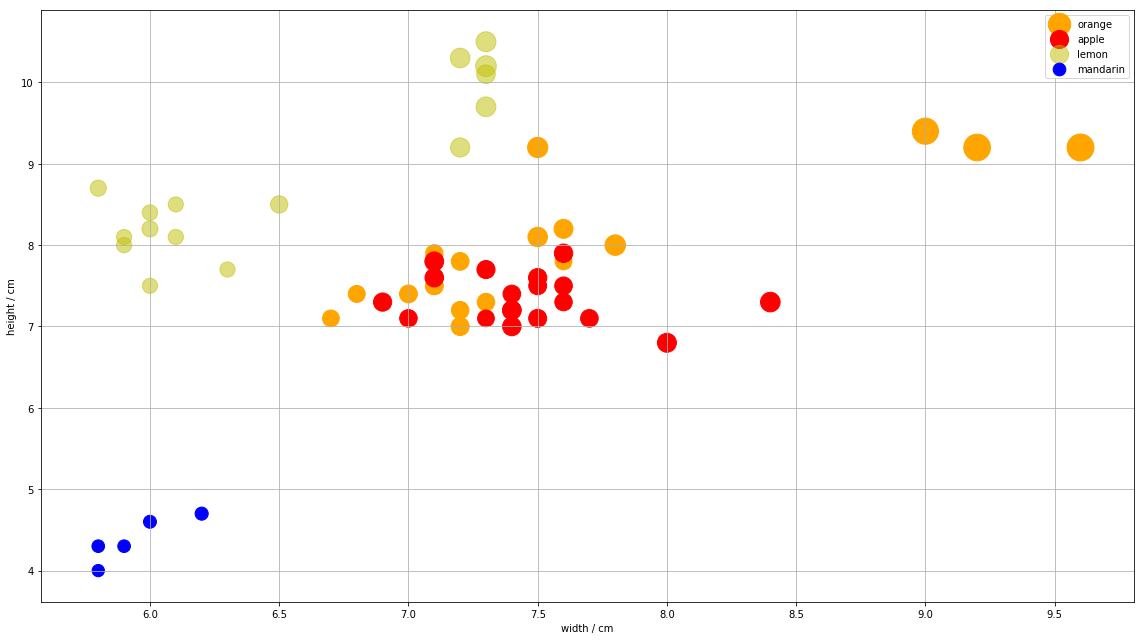

In [52]:
plt.figure(figsize=(16,9))
plt.scatter(data=orange, x=orange['width'], y=orange['height'], s=orange['mass']*2, c='orange')
plt.scatter(data=apple, x=apple['width'], y=apple['height'], s=apple['mass']*2, c='r')
plt.scatter(data=lemon, x=lemon['width'], y=lemon['height'], s=lemon['mass']*2, c='y', alpha=0.5)
plt.scatter(data=mandarin, x=mandarin['width'], y=mandarin['height'], s=mandarin['mass']*2, c='b')
plt.grid()
plt.xlabel('width / cm')
plt.ylabel('height / cm')
plt.legend(['orange','apple','lemon','mandarin'],loc='best')
plt.tight_layout()

In [53]:
train_data, test_data = train_test_split(data_df, test_size=1/5, random_state=20)

In [55]:
test_data.iterrows

<bound method DataFrame.iterrows of    fruit_name  mass  width  height  color_score
4    mandarin    84    6.0     4.6         0.79
23      apple   170    7.6     7.9         0.88
17      apple   168    7.5     7.6         0.73
56      lemon   116    5.9     8.1         0.73
37     orange   154    7.3     7.3         0.79
12      apple   154    7.0     7.1         0.88
52      lemon   118    5.9     8.0         0.72
5    mandarin    80    5.8     4.3         0.77
24     orange   342    9.0     9.4         0.75
36     orange   160    7.1     7.6         0.76
44      lemon   200    7.3    10.5         0.72
2       apple   176    7.4     7.2         0.60>

In [63]:
acc_count = 0
for idx, row in test_data.iterrows():
    test_sample_feat = row[FEAT_COLS].values
    dis_list = []
    for i, r in train_data.iterrows():
        train_sample_feat = r[FEAT_COLS].values
        dis = euclidean(train_sample_feat, test_sample_feat)
        dis_list.append(dis)
    pos = np.argmin(dis_list)
    pred_label = train_data.iloc[pos]['fruit_name']
    true_label = row['fruit_name']
    if true_label == pred_label:
        acc_count += 1
    accuracy = acc_count/test_data.shape[0]
    print('predict:' , pred_label, ' -> ','ture:', true_label)
print(accuracy)

predict: mandarin  ->  ture: mandarin
predict: apple  ->  ture: apple
predict: apple  ->  ture: apple
predict: lemon  ->  ture: lemon
predict: orange  ->  ture: orange
predict: orange  ->  ture: apple
predict: lemon  ->  ture: lemon
predict: mandarin  ->  ture: mandarin
predict: orange  ->  ture: orange
predict: orange  ->  ture: orange
predict: lemon  ->  ture: lemon
predict: apple  ->  ture: apple
0.9166666666666666


```python
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import euclidean
import numpy as np


# 使用的特征列
FEAT_COLS = ['mass', 'width', 'height', 'color_score']


def get_prediction(test_sample_feat, train_data):
    """
        在训练集中找出和test_sample_feat最近的训练样本，并以训练样本的标签作为预测值
        参数：
            -test_sample_feat: 测试样本的特征
            -train_data:  训练集
        返回：
            -pred_label:  预测结果
    """
    dis_list = []

    for idx, row in train_data.iterrows():
        # 训练样本特征
        train_sample_feat = row[FEAT_COLS].values

        # 2. 样本间距离计算
        dis = euclidean(train_sample_feat, test_sample_feat)
        dis_list.append(dis)

    # 3. 找到最近的样本
    pos = np.argmin(dis_list)
    pred_label = train_data.iloc[pos]['fruit_name']
    return pred_label


def main():
    """
        主函数
    """
    # 读取数据文件
    fruit_data = pd.read_csv('./fruit_data.csv')

    # 1. 分割数据集
    train_data, test_data = train_test_split(fruit_data, test_size=1/5, random_state=20)

    # 预测准确的个数
    acc_count = 0

    # 对测试集中每个样本做预测
    for idx, row in test_data.iterrows():
        # 测试样本特征
        test_sample_feat = row[FEAT_COLS].values

        # 在训练集中找出和该样本最近的训练样本，并以训练样本的标签作为预测值
        pred_label = get_prediction(test_sample_feat, train_data)

        # 真实标签
        true_label = row['fruit_name']
        print('样本{}的真实标签：{}，预测标签：{}'.format(idx, true_label, pred_label))

        if pred_label == true_label:
            acc_count += 1

    # 4. 使用准确率验证模型
    accuracy = acc_count / test_data.shape[0]
    print('预测准确率为：{:.2f}%'.format(accuracy * 100))


if __name__ == '__main__':
    main()
```